## (부록)서울시에서 공개한 코로나19 발생동향 수집

🌱 인프런 📈 단 두 장의 문서로 데이터 분석과 시각화 뽀개기⚡️ 전체 보기 👉 https://bit.ly/inflearn-pandas-tutorial 


* 6월 30일 이전 데이터로 실습하시되 최근 데이터로 실습하고자 하시는 분들을 위한 자료 입니다.
* 이 내용은 <font color="red">판다스 수업 범위를 벗어나는 부분이 많기 때문에 참고사항</font>으로만 보세요!

* http://www.seoul.go.kr/coronaV/coronaStatus.do

In [133]:
# 필요한 라이브러리를 불러옵니다.

import pandas as pd
import numpy as np

In [134]:
# 크롤링으로 가져올 url 주소를 입력합니다.

url = "http://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [135]:
"""
11월 중순 이후 확진자가 증가하면서 데이터 공개 방식이 달라져서 pandas 의 read_html 로는 불러올 수가 없습니다.
기존의 read_html 로는 컬럼명을 불러오고 데이터는 requests 라는 라이브러리를 통해 읽어옵니다.
"""

'\n11월 중순 이후 확진자가 증가하면서 데이터 공개 방식이 달라져서 pandas 의 read_html 로는 불러올 수가 없습니다.\n기존의 read_html 로는 컬럼명을 불러오고 데이터는 requests 라는 라이브러리를 통해 읽어옵니다.\n'

In [136]:
# 판다스의 read_html 을 통해 위 url에 있는 불러옵니다.

table = pd.read_html(url)

In [137]:
len(table)

8

In [170]:
# read_html 은 사이트 내의 html 태그를 불러옵니다.

table[0]

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,8314,5336,3655,5764,6938,4313,6491,3154,5320,3520,5069,5143,4605
1,+39,+52,+31,+51,+78,+19,+63,+31,+55,+31,+51,+25,+20
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,3431,5132,3573,5189,8128,4233,6200,3352,5547,2320,2289,4745,9070
4,+37,+34,+26,+44,+46,+34,+44,+13,+58,+25,+16,+21,+61


In [139]:
# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.

table[1]

,강남구,강동구,강북구,강서구,관악구,광진구
0,8314,5336,3655,5764,6938,4313
1,+39,+52,+31,+51,+78,+19
2,구로구,금천구,노원구,도봉구,동대문구,동작구
3,6491,3154,5320,3520,5069,5143
4,+63,+31,+55,+31,+51,+25
5,마포구,서대문구,서초구,성동구,성북구,송파구
6,4605,3431,5132,3573,5189,8128
7,+20,+37,+34,+26,+44,+46
8,양천구,영등포구,용산구,은평구,종로구,중구
9,4233,6200,3352,5547,2320,2289


In [202]:
# 미리보기 합니다.

df = table[5]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


## 11월 중순 이후 데이터 공개방식 변경

In [141]:
import requests

In [142]:
# f-string
url = "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1"
# url = f"{url}&columns%5B0%5D%5Bdata%5D=0&columns%5B0%5D%5Bname%5D=&columns%5B0%5D%5Bsearchable%5D=true&columns%5B0%5D%5Borderable%5D=true&columns%5B0%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B0%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B1%5D%5Bdata%5D=1&columns%5B1%5D%5Bname%5D=&columns%5B1%5D%5Bsearchable%5D=true&columns%5B1%5D%5Borderable%5D=true&columns%5B1%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B1%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B2%5D%5Bdata%5D=2&columns%5B2%5D%5Bname%5D=&columns%5B2%5D%5Bsearchable%5D=true&columns%5B2%5D%5Borderable%5D=true&columns%5B2%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B2%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B3%5D%5Bdata%5D=3&columns%5B3%5D%5Bname%5D=&columns%5B3%5D%5Bsearchable%5D=true&columns%5B3%5D%5Borderable%5D=true&columns%5B3%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B3%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B4%5D%5Bdata%5D=4&columns%5B4%5D%5Bname%5D=&columns%5B4%5D%5Bsearchable%5D=true&columns%5B4%5D%5Borderable%5D=true&columns%5B4%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B4%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B5%5D%5Bdata%5D=5&columns%5B5%5D%5Bname%5D=&columns%5B5%5D%5Bsearchable%5D=true&columns%5B5%5D%5Borderable%5D=true&columns%5B5%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B5%5D%5Bsearch%5D%5Bregex%5D=false&columns%5B6%5D%5Bdata%5D=6&columns%5B6%5D%5Bname%5D=&columns%5B6%5D%5Bsearchable%5D=true&columns%5B6%5D%5Borderable%5D=true&columns%5B6%5D%5Bsearch%5D%5Bvalue%5D=&columns%5B6%5D%5Bsearch%5D%5Bregex%5D=false&order%5B0%5D%5Bcolumn%5D=0&order%5B0%5D%5Bdir%5D=desc"
url = f"{url}&start=0&length=100"
# "&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1606633538547"
url

'https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&start=0&length=100'

In [176]:
response = requests.get(url)
data_json = response.json()
pd.DataFrame(data_json["data"])

,0,1,2,3,4,5,6
0,<p class='corona19_no'>131809</p>,395220,2021-11-13,구로구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>131808</p>,395210,2021-11-13,영등포구,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>131807</p>,395177,2021-11-13,성북구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>131806</p>,395176,2021-11-13,구로구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>131805</p>,395173,2021-11-13,성북구,-,감염경로 조사중,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>131714</p>,393189,2021-11-13,성동구,-,기타 확진자 접촉,<b class='status2'>-</b>
96,<p class='corona19_no'>131713</p>,393870,2021-11-13,동대문구,-,기타 확진자 접촉,<b class='status2'>-</b>
97,<p class='corona19_no'>131712</p>,395312,2021-11-13,성동구,-,감염경로 조사중,<b class='status2'>-</b>
98,<p class='corona19_no'>131711</p>,393380,2021-11-13,동대문구,-,감염경로 조사중,<b class='status2'>-</b>


In [177]:
records_total = data_json['recordsTotal']
records_total

61809

In [178]:
end_page = round(records_total / 100) + 1
end_page

619

In [180]:
data = data_json["data"]
#data

In [181]:
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>131809</p>,395220,2021-11-13,구로구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>131808</p>,395210,2021-11-13,영등포구,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>131807</p>,395177,2021-11-13,성북구,-,감염경로 조사중,<b class=''>-</b>
3,<p class='corona19_no'>131806</p>,395176,2021-11-13,구로구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>131805</p>,395173,2021-11-13,성북구,-,감염경로 조사중,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>131714</p>,393189,2021-11-13,성동구,-,기타 확진자 접촉,<b class='status2'>-</b>
96,<p class='corona19_no'>131713</p>,393870,2021-11-13,동대문구,-,기타 확진자 접촉,<b class='status2'>-</b>
97,<p class='corona19_no'>131712</p>,395312,2021-11-13,성동구,-,감염경로 조사중,<b class='status2'>-</b>
98,<p class='corona19_no'>131711</p>,393380,2021-11-13,동대문구,-,감염경로 조사중,<b class='status2'>-</b>


## 함수로 만들기

In [149]:
def get_seoul_covid19_100(page_no):
    """
    page_no : 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
    start_no : 입력받은 page_no로 시작 번호를 의미
    """
    start_no = (page_no - 1) * 100
    url = f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw={page_no}"
    url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
    response = requests.get(url)
    data_json = response.json()
    return data_json

In [183]:
# 데이터가 있 때 
get_seoul_covid19_100(3)

{'draw': 3,
 'recordsTotal': 61809,
 'recordsFiltered': 61809,
 'data': [["<p class='corona19_no'>131609</p>",
   '393725',
   '2021-11-13',
   '노원구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131608</p>",
   '395180',
   '2021-11-13',
   '강북구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131607</p>",
   '393994',
   '2021-11-13',
   '서대문구',
   '-',
   '감염경로 조사중',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131606</p>",
   '394825',
   '2021-11-13',
   '송파구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131605</p>",
   '395330',
   '2021-11-13',
   '금천구',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131604</p>",
   '394811',
   '2021-11-13',
   '타시도',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'>131603</p>",
   '394419',
   '2021-11-13',
   '타시도 ',
   '-',
   '기타 확진자 접촉',
   "<b class=''>-</b>"],
  ["<p class='corona19_no'

In [184]:
# 데이터가 없을 때 
get_seoul_covid19_100(-1)

{'draw': -1, 'recordsTotal': 61809, 'recordsFiltered': 61809, 'data': []}

## 전체 데이터 가져오기

### tqdm 
* [tqdm documentation](https://tqdm.github.io/)
* 오래 걸리는 작업의 진행상태를 표시해 줍니다.
* 별도의 설치가 필요 합니다.
* `!pip install tqdm` 으로 설치가 필요합니다.

In [152]:
# !pip install tqdm

In [185]:
# time.sleep 으로 시차를 두기 위해
import time
# tqdm : 진행상태를 표시하기 위해
from tqdm import trange

In [154]:
# # 주석처리 : ctrl + /
# page_list = []
# for page_no in trange(1, 4):
#     one_page = get_seoul_covid19_100(page_no)
#     if len(one_page["data"]) > 0:
#         one_page = pd.DataFrame(one_page["data"])
#         page_list.append(one_page)
#         time.sleep(0.5)
#     else:
#         break

In [155]:
# page_list

In [156]:
# pd.concat(page_list)

In [238]:
# 전체 페이지를 가져오기 전에 일부 페이지만 실행
page_list = []
# 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
# 처음부터 전체 페이지를 수집하면 중간에 오류가 나도 찾기가 어렵습니다.
# 일부만 우선 가져와 보고 잘 동작한다면 전체를 가져오도록 합니다.
all_page = 600
for page_no in trange(all_page + 1):
    one_page = get_seoul_covid19_100(page_no)
    one_page = pd.DataFrame(one_page["data"])
    page_list.append(one_page)
    # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
    # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
    time.sleep(0.0)

100%|██████████| 601/601 [03:39<00:00,  2.74it/s]


In [239]:
# 가져온 데이터가 맞는지 확인 너무 많을 수 있기 때문에 슬라이싱으로 잘라서 보기
pd.concat(page_list)

,0,1,2,3,4,5,6
0,<p class='corona19_no'>132668</p>,397455,2021-11-14,금천구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>132667</p>,396812,2021-11-14,강동구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>132666</p>,395471,2021-11-14,강서구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>132665</p>,395524,2021-11-14,서초구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>132664</p>,397294,2021-11-14,타시도,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>72673</p>,229353,2021-08-18,강북구,-,감염경로 조사중,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>72672</p>,230357,2021-08-18,마포구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>72671</p>,229123,2021-08-18,중랑구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>72670</p>,228943,2021-08-18,성동구,-,감염경로 조사중,<b class='status1'>퇴원</b>


In [240]:
def get_multi_page_list(start_page, end_page = 80):
    # 데이터가 제대로 로드 되는지 앞부분 3페이지 정도만 확인하고 전체페이지를 가져오록 합니다.
    
    page_list = []
    for page_no in trange(start_page, end_page + 1):
        one_page = get_seoul_covid19_100(page_no)
        if len(one_page["data"]) > 0:
            one_page = pd.DataFrame(one_page["data"])
            page_list.append(one_page)
            # 서버에 한번에 너무 많은요청을 보내면 서버에 부담이 됩니다.
            # 서버에 부담을 주지 않기 위애 0.5초씩 쉬었다 가져옵니다.
            time.sleep(0.5)
        else:
            # 수집된 값이 없다면 False를 반환합니다.
            # False 반환 시 수집한 리스트를 반환하도록 합니다.
            return page_list
    return page_list

<font color="red">시작페이지와 끝페이지를 꼭 확인해 주세요.</font>

In [242]:
# 따로 설정하지 않으면 end_page 변수에 들어있는 숫자가 마지막 페이지가 됩니다.
end_page = 600

In [243]:
# 시작페이지와 끝페이지를 꼭 확인해 주세요.
start_page = 1
# end_page = 88
page_list = get_multi_page_list(start_page, end_page)
# 데이터가 너무 많기 때문에 슬라이싱으로 1개만 미리보기
page_list[:600]

100%|██████████| 600/600 [09:01<00:00,  1.11it/s]


[                                    0       1           2    3  4  \
 0   <p class='corona19_no'>132668</p>  397455  2021-11-14  금천구  -   
 1   <p class='corona19_no'>132667</p>  396812  2021-11-14  강동구  -   
 2   <p class='corona19_no'>132666</p>  395471  2021-11-14  강서구  -   
 3   <p class='corona19_no'>132665</p>  395524  2021-11-14  서초구  -   
 4   <p class='corona19_no'>132664</p>  397294  2021-11-14  타시도  -   
 ..                                ...     ...         ...  ... ..   
 95  <p class='corona19_no'>132573</p>  397333  2021-11-14  종로구  -   
 96  <p class='corona19_no'>132572</p>  397324  2021-11-14  은평구  -   
 97  <p class='corona19_no'>132571</p>  397407  2021-11-14  강동구  -   
 98  <p class='corona19_no'>132570</p>  397332  2021-11-14  성북구  -   
 99  <p class='corona19_no'>132569</p>  397280  2021-11-14  강동구  -   
 
                           5                  6  
 0                  감염경로 조사중  <b class=''>-</b>  
 1                 기타 확진자 접촉  <b class=''>-</b>  
 2      

In [244]:
page_list

[                                    0       1           2    3  4  \
 0   <p class='corona19_no'>132668</p>  397455  2021-11-14  금천구  -   
 1   <p class='corona19_no'>132667</p>  396812  2021-11-14  강동구  -   
 2   <p class='corona19_no'>132666</p>  395471  2021-11-14  강서구  -   
 3   <p class='corona19_no'>132665</p>  395524  2021-11-14  서초구  -   
 4   <p class='corona19_no'>132664</p>  397294  2021-11-14  타시도  -   
 ..                                ...     ...         ...  ... ..   
 95  <p class='corona19_no'>132573</p>  397333  2021-11-14  종로구  -   
 96  <p class='corona19_no'>132572</p>  397324  2021-11-14  은평구  -   
 97  <p class='corona19_no'>132571</p>  397407  2021-11-14  강동구  -   
 98  <p class='corona19_no'>132570</p>  397332  2021-11-14  성북구  -   
 99  <p class='corona19_no'>132569</p>  397280  2021-11-14  강동구  -   
 
                           5                  6  
 0                  감염경로 조사중  <b class=''>-</b>  
 1                 기타 확진자 접촉  <b class=''>-</b>  
 2      

In [245]:
# concat을 통해 하나의 데이터프레임으로 합쳐줍니다.
df_all = pd.concat(page_list)
df_all.shape

(60000, 7)

In [246]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [247]:
# read_html 로 읽어온 3번째 테이블의 컬럼명을 수집한 데이터의 컬럼으로 사용합니다.
cols = df.columns.tolist()
cols

['연번', '환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황']

In [248]:
df_all.columns = cols

In [249]:
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>132668</p>,397455,2021-11-14,금천구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>132667</p>,396812,2021-11-14,강동구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>132666</p>,395471,2021-11-14,강서구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>132665</p>,395524,2021-11-14,서초구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>132664</p>,397294,2021-11-14,타시도,-,기타 확진자 접촉,<b class=''>-</b>


In [250]:
df_all.shape

(60000, 7)

In [322]:
gu_count = df_all["거주지"].value_counts().sort_index()
gu_count

강남구     3258
강동구     2678
강북구     1729
강서구     2551
관악구     3018
광진구     1954
구로구     4062
금천구     1845
기타       492
노원구     2349
도봉구     1541
동대문구    2747
동작구     2029
마포구     1946
서대문구    1515
서초구     1844
성동구     1526
성북구     2457
송파구     3863
양천구     1855
영등포구    3331
용산구     1200
은평구     2636
종로구     1194
중구      1220
중랑구     1984
타시도     3176
Name: 거주지, dtype: int64

In [314]:
gu_count.iloc[0]

4062

<AxesSubplot:>

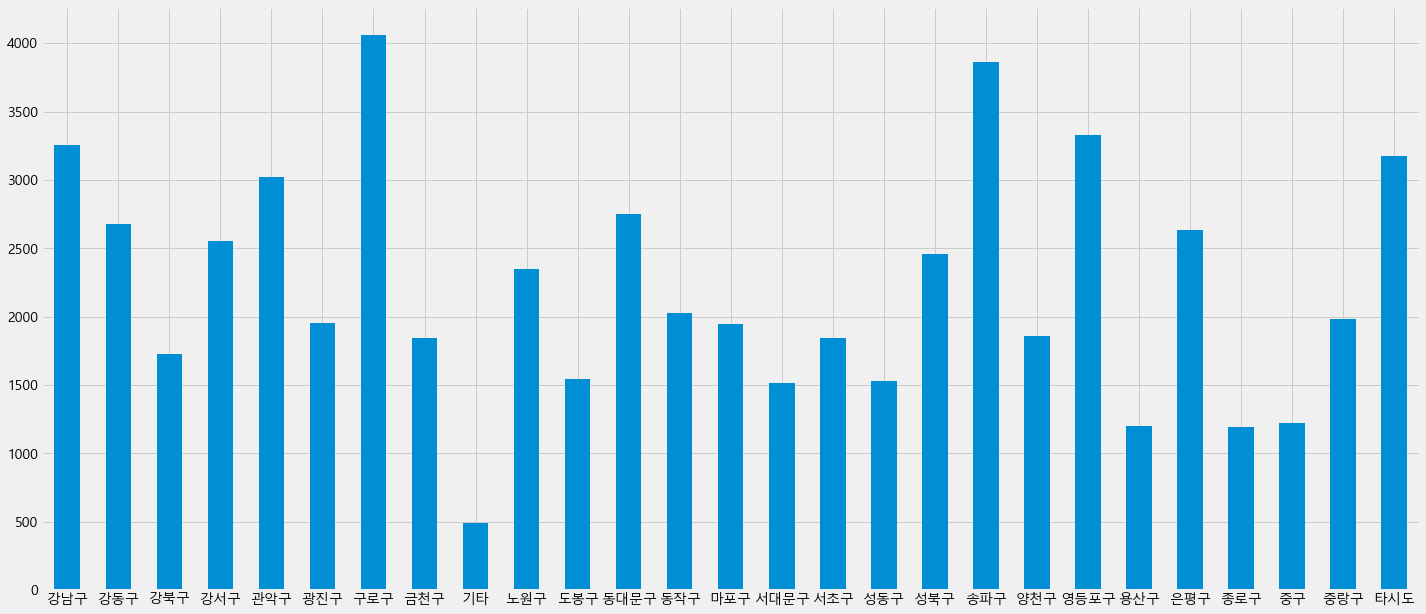

In [325]:
gu_count.plot.bar(rot=0,figsize=(22,10))

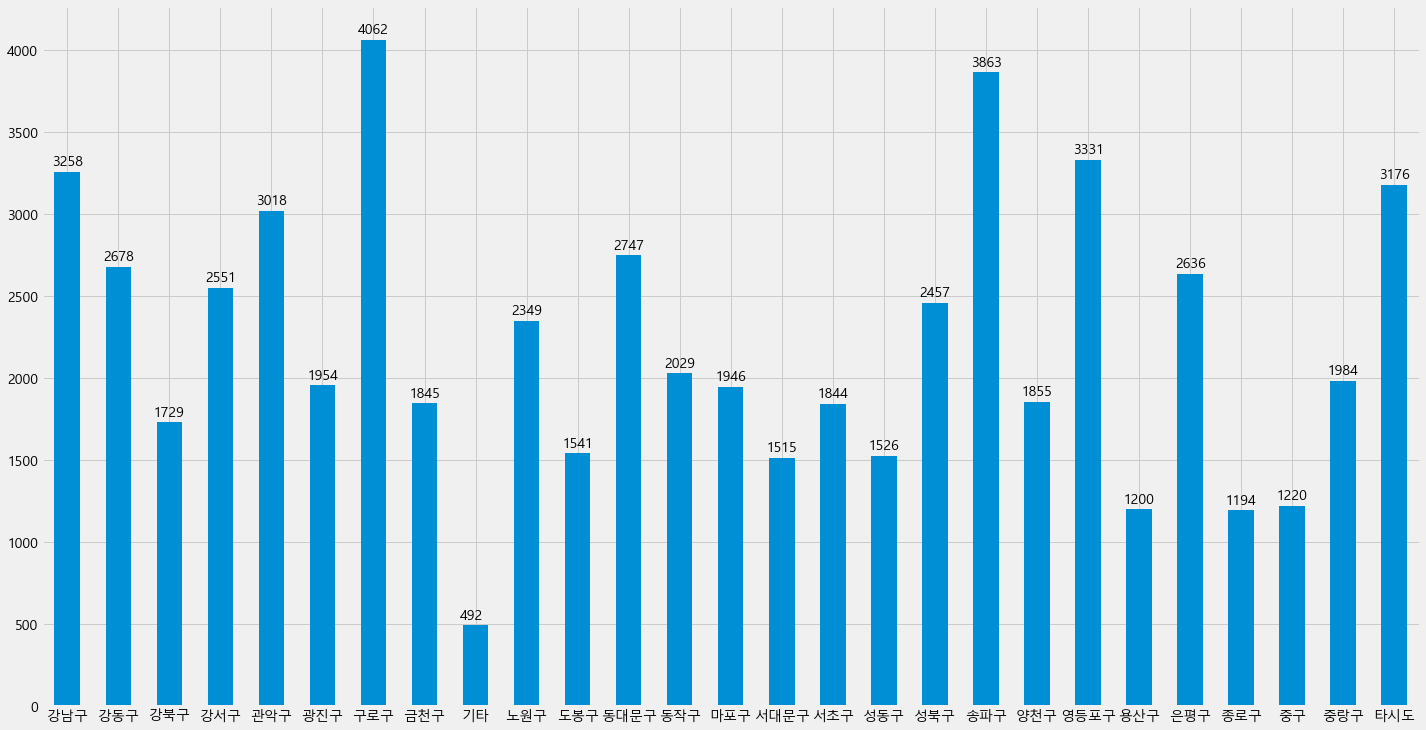

In [337]:


import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.style.use("fivethirtyeight")

gu = gu_count.plot.bar(rot=0,figsize=(22,12))

for i in range(len(gu_count)):
    gu.text(x=i-0.3, y=gu_count.iloc[i]+40, s=gu_count.iloc[i])

In [342]:
df_all

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>132668</p>,397455,2021-11-14,금천구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>132667</p>,396812,2021-11-14,강동구,-,기타 확진자 접촉,<b class=''>-</b>
2,<p class='corona19_no'>132666</p>,395471,2021-11-14,강서구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>132665</p>,395524,2021-11-14,서초구,-,기타 확진자 접촉,<b class=''>-</b>
4,<p class='corona19_no'>132664</p>,397294,2021-11-14,타시도,-,기타 확진자 접촉,<b class=''>-</b>
...,...,...,...,...,...,...,...
95,<p class='corona19_no'>72673</p>,229353,2021-08-18,강북구,-,감염경로 조사중,<b class='status1'>퇴원</b>
96,<p class='corona19_no'>72672</p>,230357,2021-08-18,마포구,-,기타 확진자 접촉,<b class='status1'>퇴원</b>
97,<p class='corona19_no'>72671</p>,229123,2021-08-18,중랑구,-,감염경로 조사중,<b class='status1'>퇴원</b>
98,<p class='corona19_no'>72670</p>,228943,2021-08-18,성동구,-,감염경로 조사중,<b class='status1'>퇴원</b>


In [371]:
first_day = df_all["확진일"].iloc[-1]
first_day

'2021-08-18'

In [370]:
last_day = df_all["확진일"].iloc[0]
last_day

'2021-11-14'

In [372]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
               '2021-08-26', '2021-08-27', '2021-08-28', '2021-08-29',
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
               '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10',
               '2021-09-11', '2021-09-12', '2021-09-13', '2021-09-14',
               '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-18',
               '2021-09-19', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-25', '2021-09-26',
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
               '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
               '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
      

In [402]:
df_days =  pd.DataFrame({"확진일": days})
df_days

,확진일
0,2021-08-18
1,2021-08-19
2,2021-08-20
3,2021-08-21
4,2021-08-22
...,...
84,2021-11-10
85,2021-11-11
86,2021-11-12
87,2021-11-13


In [374]:
daily_case = df_all["확진일"].value_counts()
daily_case.head()

2021-09-24    1221
2021-09-28    1051
2021-11-12    1005
2021-11-02    1004
2021-11-10    1004
Name: 확진일, dtype: int64

In [401]:
df_daily_case = pd.DataFrame(daily_case)
df_daily_case

,확진일
2021-09-24,1221
2021-09-28,1051
2021-11-12,1005
2021-11-02,1004
2021-11-10,1004
...,...
2021-08-23,436
2021-10-25,427
2021-08-22,388
2021-10-17,355


In [400]:
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2021-09-24,1221
2021-09-28,1051
2021-11-12,1005
2021-11-02,1004
2021-11-10,1004
...,...
2021-08-23,436
2021-10-25,427
2021-08-22,388
2021-10-17,355


In [399]:
all_day = df_days.merge(df_daily_case, 
                        left_on="확진일", 
                        right_on=df_daily_case.index, how="left")
all_day.head()

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [388]:
df_daily_case.dtypes

확진수    int64
dtype: object

In [389]:
df_days.dtypes

확진일    datetime64[ns]
dtype: object

## 데이터 전처리
### 연번과 퇴원현황 

In [158]:
import re
def extract_number(num_string):
    if type(num_string) == str:
        num_string = num_string.replace("corona19", "")
        num = re.sub("[^0-9]", "", num_string)
        num = int(num)
        return num
    else:
        return num_string

In [159]:
num_string = "<p class='corona19_no'>7625</p>"
extract_number(num_string)

7625

In [160]:
df_all["연번"] = df_all["연번"].map(extract_number)

KeyError: '연번'

In [ ]:
df_all["연번"].head()

In [ ]:
def extract_hangeul(origin_text):
    subtract_text = re.sub("[^가-힣]", "", origin_text)
    return subtract_text

In [ ]:
extract_hangeul("<b class='status1'>퇴원</b>")

In [ ]:
extract_hangeul("<b class='status2'>사망</b>")

In [ ]:
extract_hangeul("<b class=''></b>")

In [ ]:
# 정규표현식으로 변경하는 방법도 있고 str.contains를 사용하는 방법도 있습니다.
# df_all["퇴원현황"] = df_all["퇴원현황"].map(extract_hangeul)
# df_all["퇴원현황"].value_counts()

In [ ]:
df_all["퇴원현황"].value_counts()

In [ ]:
df_all.loc[df_all["퇴원현황"].str.contains("퇴원"), "퇴원현황"] = "퇴원"
df_all.loc[df_all["퇴원현황"].str.contains("사망"), "퇴원현황"] = "사망"
df_all.loc[~df_all["퇴원현황"].str.contains("퇴원|사망"), "퇴원현황"] = np.nan
df_all["퇴원현황"].value_counts()

In [ ]:
last_date = df_all.iloc[0]["확진일"]
last_date

In [ ]:
# 마지막 확진일을 파일명에 써주기 위해 . 을 _ 로 변경합니다.
# 확장자와 구분이 쉽게 되도록 _ 로 변경합니다. 

date = last_date.replace(".", "_")
date

In [ ]:
# 파일명을 만들어 줍니다.
# file_name

file_name = f"seoul-covid19-{date}.csv"
file_name

NameError: name 'date' is not defined

In [ ]:
# csv 파일로 저장합니다.
df_all.to_csv(file_name, index=False)

In [ ]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name)